In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 18,9
rcParams['font.family'] = 'AppleGothic' #malgun Gothic


# from google.colab import files     #colab 돌릴때
# uploaded = files.upload()          #colab 돌릴때

In [ ]:
red = pd.read_csv("winequality-red.csv", sep=';')             # 구분자가 콤마, 가 아닌....  세미콜론;임
print(red.shape)
red.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
import glob      # 묶어주는 라이브러리
import os        # 폴더를 컨트롤

In [ ]:
all_files = glob.glob(os.path.join('wine*'))
all_files

['winequality-red.csv', 'winequality-white.csv']

In [ ]:
all_data = []     # 모든 데이터를 저장하기 위해 빈리스트를 만들어둠

i=0

for file in all_files:
    data = pd.read_csv(file, sep=';')
    data['type']=i
    all_data.append(data)
    i+=1         # 타입을 확인함.   레드는 0, 화이트는 1로 정의하여 와인 구분함.
    
wine = pd.concat(all_data, ignore_index=True)      # 데이터를 합침concat, concat은 axis가 기본값이   0임,  
                                                    #기존인데스를 가지고 와서 6천여개중 4900여개로 표시됨, 그래서 기존 인데스 무시처리

In [ ]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [ ]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


> **우리의 목표: 와인성분데이터를 넣으면 와인의 품질을 예측하는 모형

In [ ]:
sorted(wine.quality.unique())             # 목표 변수

[3, 4, 5, 6, 7, 8, 9]

In [ ]:
wine.quality.value_counts()               # 값 별 카운트

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [ ]:
wine[wine.quality ==9]                   # 특정 값을 지는 리스트를 보고 싶어

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
2373,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9,1
2419,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9,1
2426,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9,1
2475,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9,1
3204,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9,1


### 탐색적분석  ------------------------
- 레드와인인지 화이트와인인지에 따라 품질이 다를까?

In [ ]:
wine.groupby('type').quality.describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
0,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
1,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [ ]:
red_quality = wine.loc[wine.type == 0, 'quality']


In [ ]:
white_quality = wine.loc[wine.type==1, 'quality']


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='quality', ylabel='Density'>

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


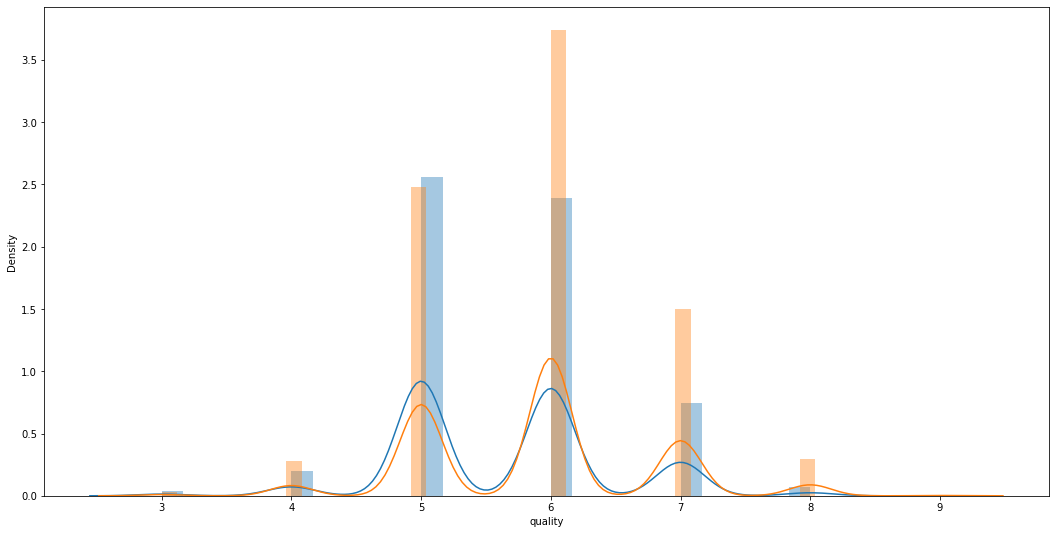

In [ ]:
sns.distplot(red_quality, label='Red')
sns.distplot(white_quality, label="White")

### T검정
- 와인종류에 따른 품질의 차이가 통계적으로 유의한지 확인하기 위함
- p value < 0.05     그래야 유의미한 의미임 95%  ******

In [ ]:
import statsmodels.api as sm

In [ ]:
tstat, pvalue, df = sm.stats.ttest_ind(red_quality, white_quality)

In [ ]:
print("T값은 %.5f, p-value는 %.8f"%(tstat, pvalue))

T값은 -9.68565, p-value는 0.00000000


### 상관관계분석

In [ ]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,-0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,-0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,-0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,-0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,-0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,-0.487218


<AxesSubplot:>

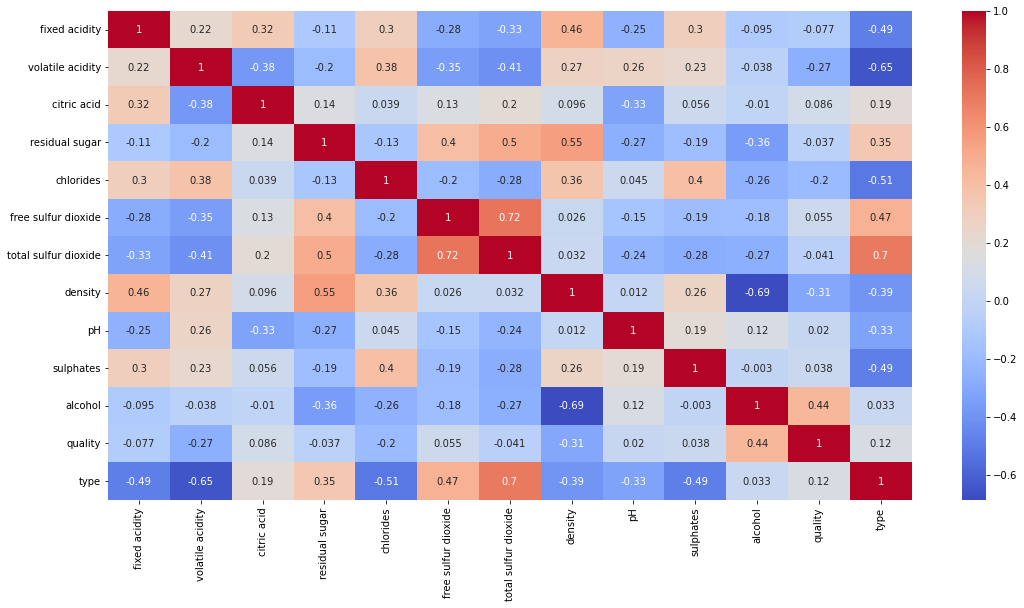

In [ ]:
sns.heatmap(wine.corr(), annot=True, cmap='coolwarm')

In [ ]:
#너무 상관관계가 높은 아이들끼리는 같이 쓰지말고 둘중 하나를 쓰는게 좋음 공분산도가 높아짐

In [ ]:
wine.corrwith(wine.quality).sort_values()

density                -0.305858
volatile acidity       -0.265699
chlorides              -0.200666
fixed acidity          -0.076743
total sulfur dioxide   -0.041385
residual sugar         -0.036980
pH                      0.019506
sulphates               0.038485
free sulfur dioxide     0.055463
citric acid             0.085532
type                    0.119323
alcohol                 0.444319
quality                 1.000000
dtype: float64

### 산점도 pairplot
- 모든 회귀문제는 산점도가 있어야 파악이 용이
- 하지만 모든 점을 산점도를 그리면   성능문제발생,   그래서 샘플링을 하여 산점도로 변수간 관계를 만듦

In [ ]:
def sampling(data, n=300):         #와인 샘플링
    return data.loc[np.random.choice(data.index, size=n, replace=False)]        #choice  인덱스 골라냄,  replace 중복미허용F

In [ ]:
red = wine[wine.type ==0]
white = wine[wine.type ==1]

In [ ]:
red_sample = sampling(red)
print(red_sample.shape)
red_sample.head()

(300, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
240,8.9,0.635,0.37,1.7,0.263,5.0,62.0,0.99710,3.00,1.09,9.3,5,0
1339,7.5,0.510,0.02,1.7,0.084,13.0,31.0,0.99538,3.36,0.54,10.5,6,0
1254,7.8,0.700,0.06,1.9,0.079,20.0,35.0,0.99628,3.40,0.69,10.9,5,0
1305,7.5,0.610,0.26,1.9,0.073,24.0,88.0,0.99612,3.30,0.53,9.8,5,0
877,7.7,0.715,0.01,2.1,0.064,31.0,43.0,0.99371,3.41,0.57,11.8,6,0


In [ ]:
white_sample = sampling(white)
print(white_sample.shape)
white_sample.head()

(300, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
3299,6.7,0.26,0.30,1.8,0.043,25.0,121.0,0.99440,3.44,0.61,10.2,6,1
3389,9.4,0.16,0.30,1.4,0.042,26.0,176.0,0.99540,3.15,0.46,9.1,5,1
2643,7.2,0.21,0.37,1.6,0.049,23.0,94.0,0.99240,3.16,0.48,10.9,7,1
6229,5.7,0.25,0.32,12.2,0.041,43.0,127.0,0.99524,3.23,0.53,10.4,7,1
5480,6.0,0.28,0.24,17.8,0.047,42.0,111.0,0.99896,3.10,0.45,8.9,6,1


In [ ]:
wine_sample = pd.concat([red_sample, white_sample])

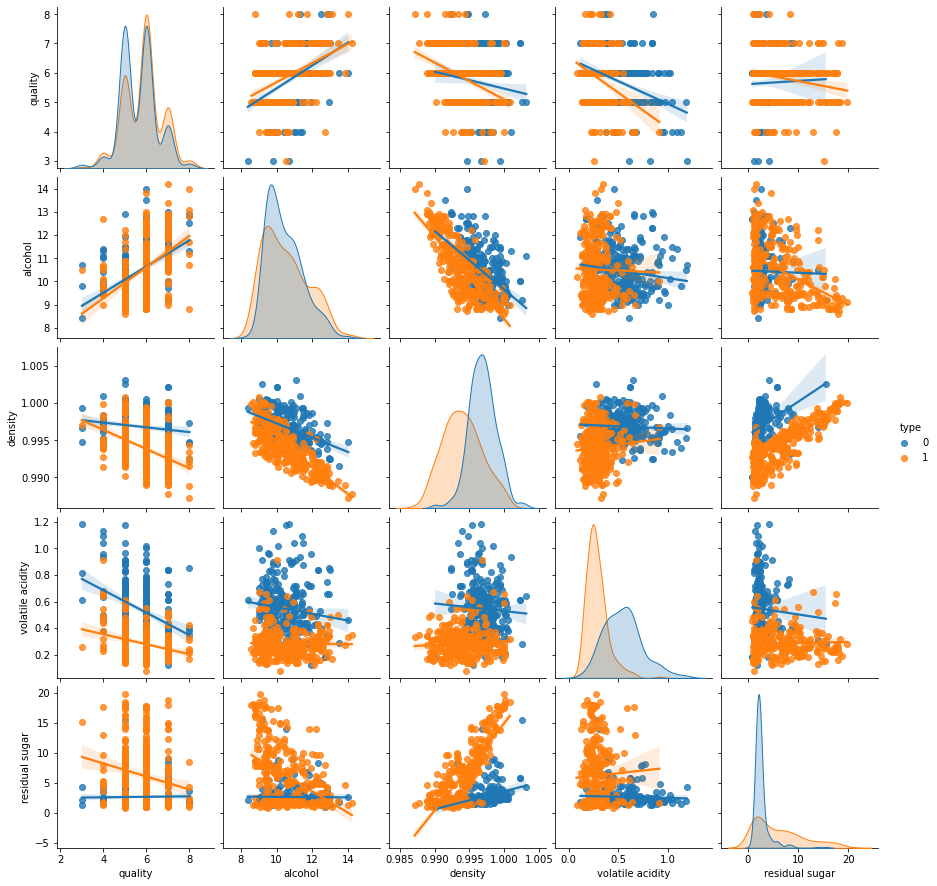

In [ ]:
sns.pairplot(wine_sample, hue='type', kind='reg',
            vars=['quality', 'alcohol', 'density', 'volatile acidity', 'residual sugar'])     #pairplot 회귀문제에서 꼭 필요***

### .
- 선형회귀모형  만들기

In [ ]:
wine.columns = wine.columns.str.replace(' ','_')

In [ ]:
wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [ ]:
features = ['fixed_acidity', 'volatile_acidity', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type']            #예측모델을 만들기 위해 핏쳐 셀렉션을 함

In [ ]:
# features_B = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type']

In [ ]:
# features_C = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'density']

In [ ]:
# features_D = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'density','fixed_acidity']

In [ ]:
# features_E = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'density','fixed_acidity', 'chlorides']

In [ ]:
# features_F = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'density','fixed_acidity', 'chlorides', 'free_sulfur_dioxide']

In [ ]:
# features_G = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'density','fixed_acidity', 'chlorides', 'free_sulfur_dioxide', 'pH']

In [ ]:
features_H = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'density','fixed_acidity', 'chlorides', 'free_sulfur_dioxide', 'pH', 'sulphates']

In [ ]:
features_Z = ['volatile_acidity', 'residual_sugar','density','alcohol', 'type', 'density','fixed_acidity', 'chlorides', 'free_sulfur_dioxide', 'pH', 'sulphates', 'citric_acid']

In [ ]:
y = wine.quality
X = wine[wine.columns.difference(['quality', 'type'])]
X_standard = (X - X.mean())/ X.std()    #표준화 : 단위기준을 맞춤
wine_standard = pd.concat([X_standard, wine.quality, wine.type], axis=1)

In [ ]:
X = wine_standard[features]
# X_B = wine_standard[features_B]
# X_C = wine_standard[features_C]
# X_D = wine_standard[features_D]
# X_E = wine_standard[features_E]
# X_F = wine_standard[features_F]
# X_G = wine_standard[features_G]
X_H = wine_standard[features_H]
X_Z = wine_standard[features_Z]

# 훈련데이터셋과 테스트데이터셋으로 나누자
### 회귀분석의 경우는.... 훈련데이터셋과 테스트 데이터 셋을 나누어야 함

In [ ]:
from sklearn.model_selection import train_test_split                   #머신러닝 라이브러리는 사이킷런에 있음

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, wine.quality, train_size=0.8, random_state=31)

# X_B_train, X_B_test, y_B_train, y_B_test = train_test_split(X_B, wine.quality, train_size=0.8, random_state=31)
# X_C_train, X_C_test, y_C_train, y_C_test = train_test_split(X_C, wine.quality, train_size=0.8, random_state=31)
# X_D_train, X_D_test, y_D_train, y_D_test = train_test_split(X_D, wine.quality, train_size=0.8, random_state=31)
# X_E_train, X_E_test, y_E_train, y_E_test = train_test_split(X_E, wine.quality, train_size=0.8, random_state=31)
# X_F_train, X_F_test, y_F_train, y_F_test = train_test_split(X_F, wine.quality, train_size=0.8, random_state=31)
# X_G_train, X_G_test, y_G_train, y_G_test = train_test_split(X_G, wine.quality, train_size=0.8, random_state=31)
X_H_train, X_H_test, y_H_train, y_H_test = train_test_split(X_H, wine.quality, train_size=0.8, random_state=31)
X_Z_train, X_Z_test, y_Z_train, y_Z_test = train_test_split(X_Z, wine.quality, train_size=0.8, random_state=31)


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5197, 10)
(1300, 10)
(5197,)
(1300,)


In [ ]:
print(X_H_train.shape)
print(X_H_test.shape)
print(y_H_train.shape)
print(y_H_test.shape)

(5197, 11)
(1300, 11)
(5197,)
(1300,)


In [ ]:
print(X_Z_train.shape)
print(X_Z_test.shape)
print(y_Z_train.shape)
print(y_Z_test.shape)

(5197, 12)
(1300, 12)
(5197,)
(1300,)


In [ ]:
# 모델정의


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model_H = LinearRegression()

In [ ]:
model_Z = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model_H.fit(X_H_train, y_H_train)

LinearRegression()

In [ ]:
model_Z.fit(X_Z_train, y_Z_train)

LinearRegression()

In [ ]:
prediction = model.predict(X_test)

In [ ]:
prediction_H = model_H.predict(X_H_test)

In [ ]:
prediction_Z = model_Z.predict(X_Z_test)

In [ ]:
prediction

array([5.60905571, 5.62501168, 6.17583394, ..., 5.29490736, 6.05439488,
       5.41107896])

In [ ]:
prediction_H

array([5.60905571, 5.62501168, 6.17583394, ..., 5.29490736, 6.05439488,
       5.41107896])

In [ ]:
prediction_Z

array([5.61264262, 5.6246845 , 6.17841976, ..., 5.2861137 , 6.06067205,
       5.42528335])

### 모델평가

In [ ]:
from sklearn import metrics

In [ ]:
metrics.mean_absolute_error(y_test, prediction)

0.5526961889267856

In [ ]:
metrics.mean_absolute_error(y_H_test, prediction_H)

0.5526961889267856

In [ ]:
metrics.mean_absolute_error(y_Z_test, prediction_Z)

0.5522705448313785

In [ ]:
metrics.mean_squared_error(y_test, prediction)                 #  오류율이 낮아야 좋은 모델    

0.48849919036916023

In [ ]:
metrics.mean_squared_error(y_H_test, prediction_H)

0.4884991903691604

In [ ]:
metrics.mean_squared_error(y_Z_test, prediction_Z)

0.48822421255381326

### 하단 개인작업구간

### 숫자를 떨어뜨려라  (과제)
- 1. 그전에 핏쳐의 셀렉션과 조합, 핏처 엔지니어링... 등
- 2. 하이퍼 파라메터 수정해가며 수정
- 3. 랜덤포레스트 이용.

> **metrics.mean_squared_error(y_test, prediction)   오류율 낮추기 

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# test_model = RandomForestRegressor(n_estimators = 300, 
#                                   max_depth = 20, 
#                                   max_features =0.7,
#                                   random_state=31)

In [ ]:
# test_model = RandomForestRegressor(n_estimators = 300, 
#                                    max_depth = 15, 
#                                    max_features =0.7,
#                                    random_state=51)

In [ ]:
# test_model = RandomForestRegressor(n_estimators = 300, 
#                                    max_depth = 10, 
#                                    max_features =0.7,
#                                    random_state=51)

In [ ]:
# test_model = RandomForestRegressor(n_estimators = 300, 
#                                    max_depth = 5, 
#                                    max_features =0.7,
#                                    random_state=51)

In [ ]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=5)                 #'neg_mean_squared_error'

In [ ]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=10)                 #'neg_mean_squared_error'

In [ ]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=15)                 #'neg_mean_squared_error'

In [ ]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=20)                 #'neg_mean_squared_error'

In [ ]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=25)                 #'neg_mean_squared_error'

In [ ]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=30)                 #'neg_mean_squared_error'

In [ ]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=40)                 #'neg_mean_squared_error'

In [ ]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=50)                 #'neg_mean_squared_error'

In [ ]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=5).mean()

In [ ]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=10).mean()

In [ ]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=15).mean()

In [ ]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=20).mean()

In [ ]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=25).mean()

In [ ]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=30).mean()

In [ ]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=40).mean()

In [ ]:
# cross_val_score(test_model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=50).mean()

# 하이퍼 파라메터 시작...


In [ ]:
hyper_result =[]

# max_depth = [3,5,7,9,11,13]
# max_feature = [0.7,0.8,0.9,1.0]


# for a in max_depth:
#     for b in max_feature:

#         model_E = RandomForestRegressor(n_estimators = 500, 
#                                       max_depth = a, 
#                                       max_features =b,
#                                       min_samples_split=2,
#                                       min_samples_leaf=1,
#                                       random_state=31)

for i in range(30):
    a = np.random.randint(5,30)
    b = np.random.uniform(0.4,1.0)
    model = RandomForestRegressor(n_estimators = 100, 
                                  max_depth = a, 
                                  max_features =b,
                                  min_samples_split=5,
                                  min_samples_leaf=1,
                                  random_state=31)

    score = cross_val_score(model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=25).mean()

    hyper_result.append({'점수' : score,
                         '피쳐모델' : "basic",
                         'MAX_depth': a,
                         'MAX_features': b})
              

    print("현재 스코어는 {0:.5f}".format(score))


현재 스코어는 -0.34556
현재 스코어는 -0.13573
현재 스코어는 -0.45737
현재 스코어는 -0.30909
현재 스코어는 -0.31351
현재 스코어는 -0.48584
현재 스코어는 -0.45517
현재 스코어는 -0.38471
현재 스코어는 -0.14328
현재 스코어는 -0.35933
현재 스코어는 -0.27763
현재 스코어는 -0.13595
현재 스코어는 -0.13815
현재 스코어는 -0.13689
현재 스코어는 -0.13557
현재 스코어는 -0.24328
현재 스코어는 -0.13564
현재 스코어는 -0.42204
현재 스코어는 -0.13942
현재 스코어는 -0.14045
현재 스코어는 -0.35047
현재 스코어는 -0.21414
현재 스코어는 -0.19227
현재 스코어는 -0.42988
현재 스코어는 -0.13582
현재 스코어는 -0.13723
현재 스코어는 -0.13609
현재 스코어는 -0.13566


In [ ]:
pd.DataFrame(hyper_result).sort_values(by='점수', ascending=False) 

In [ ]:
hyper_result2 =[]

# max_depth = [3,5,7,9,11,13]
# max_feature = [0.7,0.8,0.9,1.0]


# for a in max_depth:
#     for b in max_feature:

#         model_E = RandomForestRegressor(n_estimators = 500, 
#                                       max_depth = a, 
#                                       max_features =b,
#                                       min_samples_split=2,
#                                       min_samples_leaf=1,
#                                       random_state=31)

for i in range(30):
    a = np.random.randint(5,30)
    b = np.random.uniform(0.4,1.0)
    model2 = RandomForestRegressor(n_estimators = 200,                         # 100~1000
                                  max_depth = a, 
                                  max_features =b,
                                  min_samples_split=5,
                                  min_samples_leaf=1,
                                  random_state=31)

    score = cross_val_score(model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=25).mean()

    hyper_result2.append({'점수' : score,
                         '피쳐모델' : "basic",
                         'MAX_depth': a,
                         'MAX_features': b})
              

    print("현재 스코어는 {0:.5f}".format(score))


In [ ]:
pd.DataFrame(hyper_result2).sort_values(by='점수', ascending=False) 

In [ ]:
hyper_result_H =[]


# max_depth = [3,5,7,9,11,13]
# max_feature = [0.7,0.8,0.9,1.0]


# for a in max_depth:
#     for b in max_feature:

#         model_E = RandomForestRegressor(n_estimators = 500, 
#                                       max_depth = a, 
#                                       max_features =b,
#                                       min_samples_split=2,
#                                       min_samples_leaf=1,
#                                       random_state=31)

for i in range(30):
    a = np.random.randint(5,30)
    b = np.random.uniform(0.4,1.0)
    model_H = RandomForestRegressor(n_estimators = 100, 
                                  max_depth = a, 
                                  max_features =b,
                                  min_samples_split=5,
                                  min_samples_leaf=1,
                                  random_state=31)

        
    score_H = cross_val_score(model_H, X_H_train, y_H_train, scoring= 'neg_mean_squared_error', cv=25).mean()


    hyper_result_H.append({'점수' : score_H,
                           '피쳐모델' : "H",
                           'MAX_depth': a,
                           'MAX_features': b})      
        

    print("현재 스코어는 {0:.5f}".format(score_H))


In [ ]:
pd.DataFrame(hyper_result_H).sort_values(by='점수', ascending=False) 

In [ ]:
hyper_result_H2 =[]


# max_depth = [3,5,7,9,11,13]
# max_feature = [0.7,0.8,0.9,1.0]


# for a in max_depth:
#     for b in max_feature:

#         model_E = RandomForestRegressor(n_estimators = 500, 
#                                       max_depth = a, 
#                                       max_features =b,
#                                       min_samples_split=2,
#                                       min_samples_leaf=1,
#                                       random_state=31)

for i in range(30):
    a = np.random.randint(5,30)
    b = np.random.uniform(0.4,1.0)
    model_H2 = RandomForestRegressor(n_estimators = 200,                         # 100~1000
                                  max_depth = a, 
                                  max_features =b,
                                  min_samples_split=5,
                                  min_samples_leaf=1,
                                  random_state=31)

        
    score_H = cross_val_score(model_H2, X_H_train, y_H_train, scoring= 'neg_mean_squared_error', cv=25).mean()


    hyper_result_H2.append({'점수' : score_H,
                           '피쳐모델' : "H",
                           'MAX_depth': a,
                           'MAX_features': b})      
        

    print("현재 스코어는 {0:.5f}".format(score_H))


In [ ]:
pd.DataFrame(hyper_result_H2).sort_values(by='점수', ascending=False) 

In [ ]:
hyper_result_Z =[]


# max_depth = [3,5,7,9,11,13]
# max_feature = [0.7,0.8,0.9,1.0]


# for a in max_depth:
#     for b in max_feature:

#         model_E = RandomForestRegressor(n_estimators = 500, 
#                                       max_depth = a, 
#                                       max_features =b,
#                                       min_samples_split=2,
#                                       min_samples_leaf=1,
#                                       random_state=31)

for i in range(30):
    a = np.random.randint(5,30)
    b = np.random.uniform(0.4,1.0)
    model_Z = RandomForestRegressor(n_estimators = 100,                         # 100~1000
                                  max_depth = a, 
                                  max_features =b,
                                  min_samples_split=5,
                                  min_samples_leaf=1,
                                  random_state=31)

        
    score_Z = cross_val_score(model_Z, X_Z_train, y_Z_train, scoring= 'neg_mean_squared_error', cv=25).mean()


    hyper_result_Z.append({'점수' : score_Z,
                           '피쳐모델' : "Z",
                           'MAX_depth': a,
                           'MAX_features': b})      
        

    print("현재 스코어는 {0:.5f}".format(score_Z))


현재 스코어는 -0.38020
현재 스코어는 -0.38624
현재 스코어는 -0.39520
현재 스코어는 -0.38974
현재 스코어는 -0.38007
현재 스코어는 -0.39947
현재 스코어는 -0.40901
현재 스코어는 -0.41738
현재 스코어는 -0.49209
현재 스코어는 -0.38409
현재 스코어는 -0.38583
현재 스코어는 -0.41024
현재 스코어는 -0.38527
현재 스코어는 -0.38620
현재 스코어는 -0.39052
현재 스코어는 -0.38397
현재 스코어는 -0.38082
현재 스코어는 -0.39052
현재 스코어는 -0.44705
현재 스코어는 -0.38409
현재 스코어는 -0.38367
현재 스코어는 -0.44541
현재 스코어는 -0.44493
현재 스코어는 -0.38164
현재 스코어는 -0.38378
현재 스코어는 -0.44493
현재 스코어는 -0.39891
현재 스코어는 -0.38723
현재 스코어는 -0.38060
현재 스코어는 -0.40196


In [ ]:
pd.DataFrame(hyper_result_Z).sort_values(by='점수', ascending=False) 

,점수,피쳐모델,MAX_depth,MAX_features
4,-0.380070,Z,22,0.443843
0,-0.380196,Z,28,0.548704
28,-0.380600,Z,28,0.658885
16,-0.380816,Z,27,0.493170
23,-0.381638,Z,24,0.635703
20,-0.383667,Z,28,0.829654
24,-0.383782,Z,25,0.698863
15,-0.383973,Z,21,0.695608
19,-0.384089,Z,27,0.845595
9,-0.384089,Z,27,0.909080


In [ ]:
print(pd.DataFrame(hyper_result_Z)['점수'].mean())

-0.4010354481375472


In [ ]:
hyper_result_Z2 =[]


# max_depth = [3,5,7,9,11,13]
# max_feature = [0.7,0.8,0.9,1.0]


# for a in max_depth:
#     for b in max_feature:

#         model_E = RandomForestRegressor(n_estimators = 500, 
#                                       max_depth = a, 
#                                       max_features =b,
#                                       min_samples_split=2,
#                                       min_samples_leaf=1,
#                                       random_state=31)

for i in range(30):
    a = np.random.randint(5,30)
    b = np.random.uniform(0.4,1.0)
    model_Z2 = RandomForestRegressor(n_estimators = 200,                         # 100~1000
                                  max_depth = a, 
                                  max_features =b,
                                  min_samples_split=5,
                                  min_samples_leaf=1,
                                  random_state=31)

        
    score_Z = cross_val_score(model_Z2, X_Z_train, y_Z_train, scoring= 'neg_mean_squared_error', cv=25).mean()


    hyper_result_Z2.append({'점수' : score_Z,
                           '피쳐모델' : "Z",
                           'MAX_depth': a,
                           'MAX_features': b})      
        

    print("현재 스코어는 {0:.5f}".format(score_Z))


현재 스코어는 -0.41723
현재 스코어는 -0.38201
현재 스코어는 -0.38052
현재 스코어는 -0.38178
현재 스코어는 -0.41624
현재 스코어는 -0.37790
현재 스코어는 -0.38550
현재 스코어는 -0.38532
현재 스코어는 -0.39889
현재 스코어는 -0.40698
현재 스코어는 -0.50987
현재 스코어는 -0.38088
현재 스코어는 -0.41829
현재 스코어는 -0.40621
현재 스코어는 -0.38118
현재 스코어는 -0.38143
현재 스코어는 -0.37738
현재 스코어는 -0.50963
현재 스코어는 -0.38176
현재 스코어는 -0.38088
현재 스코어는 -0.39251
현재 스코어는 -0.38479
현재 스코어는 -0.50963
현재 스코어는 -0.37876
현재 스코어는 -0.40001
현재 스코어는 -0.38455
현재 스코어는 -0.38126
현재 스코어는 -0.40820
현재 스코어는 -0.38181
현재 스코어는 -0.40796


In [ ]:
pd.DataFrame(hyper_result_Z2).sort_values(by='점수', ascending=False) 

,점수,피쳐모델,MAX_depth,MAX_features
16,-0.377381,Z,25,0.477457
5,-0.377896,Z,26,0.462905
23,-0.378757,Z,27,0.637451
2,-0.380517,Z,18,0.529746
11,-0.380877,Z,23,0.714834
19,-0.380877,Z,23,0.720727
14,-0.381184,Z,22,0.669182
26,-0.381260,Z,29,0.685586
15,-0.381426,Z,22,0.869321
18,-0.381760,Z,19,0.807861


In [ ]:
hyper_result_Z2 =[]


# max_depth = [3,5,7,9,11,13]
# max_feature = [0.7,0.8,0.9,1.0]


# for a in max_depth:
#     for b in max_feature:

#         model_E = RandomForestRegressor(n_estimators = 500, 
#                                       max_depth = a, 
#                                       max_features =b,
#                                       min_samples_split=2,
#                                       min_samples_leaf=1,
#                                       random_state=31)

for i in range(30):
    a = np.random.randint(5,30)
    b = np.random.uniform(0.4,1.0)
    model_Z2 = RandomForestRegressor(n_estimators = 300,                         # 100~1000
                                  max_depth = a, 
                                  max_features =b,
                                  min_samples_split=5,
                                  min_samples_leaf=1,
                                  random_state=31)

        
    score_Z = cross_val_score(model_Z2, X_Z_train, y_Z_train, scoring= 'neg_mean_squared_error', cv=25).mean()


    hyper_result_Z2.append({'점수' : score_Z,
                           '피쳐모델' : "Z",
                           'MAX_depth': a,
                           'MAX_features': b})      
        

    print("현재 스코어는 {0:.5f}".format(score_Z))


현재 스코어는 -0.41586
현재 스코어는 -0.40684
현재 스코어는 -0.39166
현재 스코어는 -0.38187
현재 스코어는 -0.38758
현재 스코어는 -0.38553
현재 스코어는 -0.44313
현재 스코어는 -0.37706
현재 스코어는 -0.41586
현재 스코어는 -0.40170
현재 스코어는 -0.37673
현재 스코어는 -0.39917
현재 스코어는 -0.38177
현재 스코어는 -0.38664
현재 스코어는 -0.38375
현재 스코어는 -0.37838
현재 스코어는 -0.39183
현재 스코어는 -0.37781
현재 스코어는 -0.50937
현재 스코어는 -0.47688
현재 스코어는 -0.47688
현재 스코어는 -0.39321
현재 스코어는 -0.49203
현재 스코어는 -0.46027
현재 스코어는 -0.37667
현재 스코어는 -0.40695
현재 스코어는 -0.38076
현재 스코어는 -0.37993
현재 스코어는 -0.38149
현재 스코어는 -0.37838


In [ ]:
pd.DataFrame(hyper_result_Z2).sort_values(by='점수', ascending=False) 

,점수,피쳐모델,MAX_depth,MAX_features
24,-0.376670,Z,25,0.403361
10,-0.376731,Z,20,0.462482
7,-0.377062,Z,28,0.425804
17,-0.377810,Z,20,0.533132
15,-0.378381,Z,21,0.604197
29,-0.378381,Z,21,0.609017
27,-0.379934,Z,25,0.802425
26,-0.380756,Z,17,0.429918
28,-0.381492,Z,18,0.611719
12,-0.381768,Z,22,0.915576


In [ ]:
# hyper_result_B =[]


# # max_depth = [3,5,7,9,11,13]
# # max_feature = [0.7,0.8,0.9,1.0]


# # for a in max_depth:
# #     for b in max_feature:

# #         model_E = RandomForestRegressor(n_estimators = 500, 
# #                                       max_depth = a, 
# #                                       max_features =b,
# #                                       min_samples_split=2,
# #                                       min_samples_leaf=1,
# #                                       random_state=31)

# for i in range(100):
#     a = np.random.randint(5,30)
#     b = np.random.uniform(0.4,1.0)
#     model = RandomForestRegressor(n_estimators = 300, 
#                                   max_depth = a, 
#                                   max_features =b,
#                                   min_samples_split=5,
#                                   min_samples_leaf=1,
#                                   random_state=31)

#     score_B = cross_val_score(model_B, X_B_train, y_B_train, scoring= 'neg_mean_squared_error', cv=25).mean()

#     hyper_result_B.append({'점수' : score_B,
#                            '피쳐모델' : "B",
#                            'MAX_depth': a,
#                            'MAX_features': b})
              

#     print("현재 스코어는 {0:.5f}".format(score_B))


In [ ]:
# pd.DataFrame(hyper_result_B).sort_values(by='점수', ascending=False) 

In [ ]:
# hyper_result_C =[]


# # max_depth = [3,5,7,9,11,13]
# # max_feature = [0.7,0.8,0.9,1.0]


# # for a in max_depth:
# #     for b in max_feature:

# #         model_E = RandomForestRegressor(n_estimators = 500, 
# #                                       max_depth = a, 
# #                                       max_features =b,
# #                                       min_samples_split=2,
# #                                       min_samples_leaf=1,
# #                                       random_state=31)

# for i in range(100):
#     a = np.random.randint(5,30)
#     b = np.random.uniform(0.4,1.0)
#     model_C = RandomForestRegressor(n_estimators = 300, 
#                                   max_depth = a, 
#                                   max_features =b,
#                                   min_samples_split=5,
#                                   min_samples_leaf=1,
#                                   random_state=31)
        
#     score_C = cross_val_score(model_C, X_C_train, y_C_train, scoring= 'neg_mean_squared_error', cv=25).mean()

#     hyper_result_C.append({'점수' : score_C,
#                            '피쳐모델' : "C",
#                            'MAX_depth': a,
#                            'MAX_features': b})      
        

#     print("현재 스코어는 {0:.5f}".format(score_C))


In [ ]:
# pd.DataFrame(hyper_result_C).sort_values(by='점수', ascending=False) 


In [ ]:
# hyper_result_D =[]


# # max_depth = [3,5,7,9,11,13]
# # max_feature = [0.7,0.8,0.9,1.0]


# # for a in max_depth:
# #     for b in max_feature:

# #         model_E = RandomForestRegressor(n_estimators = 500, 
# #                                       max_depth = a, 
# #                                       max_features =b,
# #                                       min_samples_split=2,
# #                                       min_samples_leaf=1,
# #                                       random_state=31)

# for i in range(100):
#     a = np.random.randint(5,30)
#     b = np.random.uniform(0.4,1.0)
#     model_D = RandomForestRegressor(n_estimators = 300, 
#                                   max_depth = a, 
#                                   max_features =b,
#                                   min_samples_split=5,
#                                   min_samples_leaf=1,
#                                   random_state=31)

        
#     score_D = cross_val_score(model_D, X_D_train, y_D_train, scoring= 'neg_mean_squared_error', cv=25).mean()


#     hyper_result_D.append({'점수' : score_D,
#                            '피쳐모델' : "D",
#                            'MAX_depth': a,
#                            'MAX_features': b})      
        

#     print("현재 스코어는 {0:.5f}".format(score_D))


In [ ]:
# pd.DataFrame(hyper_result_D).sort_values(by='점수', ascending=False) 

In [ ]:
# hyper_result_E =[]

# # max_depth = [3,5,7,9,11,13]
# # max_feature = [0.7,0.8,0.9,1.0]


# # for a in max_depth:
# #     for b in max_feature:

# #         model_E = RandomForestRegressor(n_estimators = 500, 
# #                                       max_depth = a, 
# #                                       max_features =b,
# #                                       min_samples_split=2,
# #                                       min_samples_leaf=1,
# #                                       random_state=31)

# for i in range(100):
#     a = np.random.randint(5,30)
#     b = np.random.uniform(0.4,1.0)
#     model_E = RandomForestRegressor(n_estimators = 300, 
#                                   max_depth = a, 
#                                   max_features =b,
#                                   min_samples_split=5,
#                                   min_samples_leaf=1,
#                                   random_state=31)

        
#     score_E = cross_val_score(model_E, X_E_train, y_E_train, scoring= 'neg_mean_squared_error', cv=25).mean()


#     hyper_result_E.append({'점수' : score_E,
#                            '피쳐모델' : "E",
#                            'MAX_depth': a,
#                            'MAX_features': b})      
        

#     print("현재 스코어는 {0:.5f}".format(score_E))


In [ ]:
# pd.DataFrame(hyper_result_E).sort_values(by='점수', ascending=False) 

In [ ]:
# hyper_result_F =[]


# # max_depth = [3,5,7,9,11,13]
# # max_feature = [0.7,0.8,0.9,1.0]


# # for a in max_depth:
# #     for b in max_feature:

# #         model_E = RandomForestRegressor(n_estimators = 500, 
# #                                       max_depth = a, 
# #                                       max_features =b,
# #                                       min_samples_split=2,
# #                                       min_samples_leaf=1,
# #                                       random_state=31)

# for i in range(100):
#     a = np.random.randint(5,30)
#     b = np.random.uniform(0.4,1.0)
#     model_F = RandomForestRegressor(n_estimators = 300, 
#                                   max_depth = a, 
#                                   max_features =b,
#                                   min_samples_split=5,
#                                   min_samples_leaf=1,
#                                   random_state=31)

        
#     score_F = cross_val_score(model_F, X_F_train, y_F_train, scoring= 'neg_mean_squared_error', cv=25).mean()


#     hyper_result_F.append({'점수' : score_F,
#                            '피쳐모델' : "F",
#                            'MAX_depth': a,
#                            'MAX_features': b})      
        

#     print("현재 스코어는 {0:.5f}".format(score_F))


In [ ]:
# pd.DataFrame(hyper_result_F).sort_values(by='점수', ascending=False) 

In [ ]:
# hyper_result_G =[]


# # max_depth = [3,5,7,9,11,13]
# # max_feature = [0.7,0.8,0.9,1.0]


# # for a in max_depth:
# #     for b in max_feature:

# #         model_E = RandomForestRegressor(n_estimators = 500, 
# #                                       max_depth = a, 
# #                                       max_features =b,
# #                                       min_samples_split=2,
# #                                       min_samples_leaf=1,
# #                                       random_state=31)

# for i in range(100):
#     a = np.random.randint(5,30)
#     b = np.random.uniform(0.4,1.0)
#     model_G = RandomForestRegressor(n_estimators = 300, 
#                                   max_depth = a, 
#                                   max_features =b,
#                                   min_samples_split=5,
#                                   min_samples_leaf=1,
#                                   random_state=31)

        
#     score_G = cross_val_score(model_G, X_G_train, y_G_train, scoring= 'neg_mean_squared_error', cv=25).mean()


#     hyper_result_G.append({'점수' : score_G,
#                            '피쳐모델' : "G",
#                            'MAX_depth': a,
#                            'MAX_features': b})      
        

#     print("현재 스코어는 {0:.5f}".format(score_G))


In [ ]:
# pd.DataFrame(hyper_result_G).sort_values(by='점수', ascending=False) 

In [ ]:
print("최소에러율")
# print(pd.DataFrame(hyper_result)['점수'].max())
# print(pd.DataFrame(hyper_result2)['점수'].max())
# print(pd.DataFrame(hyper_result_B)['점수'].max())
# print(pd.DataFrame(hyper_result_C)['점수'].max())
# print(pd.DataFrame(hyper_result_D)['점수'].max())
# print(pd.DataFrame(hyper_result_E)['점수'].max())
# print(pd.DataFrame(hyper_result_F)['점수'].max())
# print(pd.DataFrame(hyper_result_G)['점수'].max())
# print(pd.DataFrame(hyper_result_H)['점수'].max())
# print(pd.DataFrame(hyper_result_H2)['점수'].max())
print(pd.DataFrame(hyper_result_Z)['점수'].max())
print(pd.DataFrame(hyper_result_Z2)['점수'].max())

print(" ")
print("평균에러율")
# print(pd.DataFrame(hyper_result)['점수'].mean())
# print(pd.DataFrame(hyper_result2)['점수'].mean())
# print(pd.DataFrame(hyper_result_B)['점수'].mean())
# print(pd.DataFrame(hyper_result_C)['점수'].mean())
# print(pd.DataFrame(hyper_result_D)['점수'].mean())
# print(pd.DataFrame(hyper_result_E)['점수'].mean())
# print(pd.DataFrame(hyper_result_F)['점수'].mean())
# print(pd.DataFrame(hyper_result_G)['점수'].mean())
# print(pd.DataFrame(hyper_result_H)['점수'].mean())
# print(pd.DataFrame(hyper_result_H2)['점수'].mean())
print(pd.DataFrame(hyper_result_Z)['점수'].mean())
print(pd.DataFrame(hyper_result_Z2)['점수'].mean())

최소에러율
-0.38007045382733506
-0.37667034432817337
 
평균에러율
-0.4010354481375472
-0.40653357481384766


In [ ]:
# 최종 모델정의

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [ ]:
Finalmodel = RandomForestRegressor()
Finalmodel2 = RandomForestRegressor()
# Finalmodel_B = RandomForestRegressor()
# Finalmodel_C = RandomForestRegressor()
# Finalmodel_D = RandomForestRegressor()
# Finalmodel_E = RandomForestRegressor()
# Finalmodel_F = RandomForestRegressor()
# Finalmodel_G = RandomForestRegressor()
# Finalmodel_H = RandomForestRegressor()
# Finalmodel_H2 = RandomForestRegressor()
Finalmodel_Z = RandomForestRegressor()
Finalmodel_Z2 = RandomForestRegressor()

In [ ]:
# Finalmodel.fit(X_train, y_train)
# Finalmodel2.fit(X_train, y_train)
# Finalmodel_B.fit(X_B_train, y_B_train)
# Finalmodel_C.fit(X_C_train, y_C_train)
# Finalmodel_D.fit(X_D_train, y_D_train)
# Finalmodel_E.fit(X_E_train, y_E_train)
# Finalmodel_F.fit(X_F_train, y_F_train)
# Finalmodel_G.fit(X_G_train, y_G_train)
# Finalmodel_H.fit(X_H_train, y_H_train)
# Finalmodel_H2.fit(X_H_train, y_H_train)
Finalmodel_Z.fit(X_H_train, y_H_train)
Finalmodel_Z2.fit(X_H_train, y_H_train)

RandomForestRegressor()

In [ ]:
# prediction = Finalmodel.predict(X_test)
# prediction2 = Finalmodel2.predict(X_test)

In [ ]:
# prediction_B = Finalmodel_B.predict(X_B_test)
# prediction_C = Finalmodel_C.predict(X_C_test)
# prediction_D = Finalmodel_D.predict(X_D_test)
# prediction_E = Finalmodel_E.predict(X_E_test)
# prediction_F = Finalmodel_F.predict(X_F_test)
# prediction_G = Finalmodel_G.predict(X_G_test)
# prediction_H = Finalmodel_H.predict(X_H_test)
# prediction_H2 = Finalmodel_H2.predict(X_H_test)
prediction_Z = Finalmodel_H.predict(X_H_test)
prediction_Z2 = Finalmodel_H2.predict(X_H_test)

In [ ]:
# prediction

In [ ]:
# prediction2

In [ ]:
# prediction_B

In [ ]:
# prediction_C

In [ ]:
# prediction_D

In [ ]:
# prediction_E

In [ ]:
# prediction_F

In [ ]:
# prediction_G

In [ ]:
# prediction_H

In [ ]:
# prediction_H2

In [ ]:
prediction_Z

array([5.97, 5.69, 6.92, ..., 5.65, 6.43, 5.41])

In [ ]:
prediction_Z2

array([5.98, 5.52, 6.9 , ..., 5.66, 6.42, 5.5 ])

### 모델평가

In [ ]:
from sklearn import metrics

In [ ]:
# metrics.mean_squared_error(y_test, prediction)                 #  오류율이 낮아야 좋은 모델    

In [ ]:
# metrics.mean_squared_error(y_test, prediction2)                 #  오류율이 낮아야 좋은 모델    

In [ ]:
# metrics.mean_squared_error(y_B_test, prediction_B)   

In [ ]:
# metrics.mean_squared_error(y_C_test, prediction_C) 

In [ ]:
# metrics.mean_squared_error(y_D_test, prediction_D) 

In [ ]:
# metrics.mean_squared_error(y_E_test, prediction_E) 

In [ ]:
# metrics.mean_squared_error(y_F_test, prediction_F) 

In [ ]:
# metrics.mean_squared_error(y_G_test, prediction_G) 

In [ ]:
# metrics.mean_squared_error(y_H_test, prediction_H)          

In [ ]:
# metrics.mean_squared_error(y_H_test, prediction_H2)          

In [ ]:
metrics.mean_squared_error(y_Z_test, prediction_Z)

0.35307076923076924

In [ ]:
metrics.mean_squared_error(y_Z2_test, prediction_Z2)

NameError: name 'y_Z2_test' is not defined

### 상단 개인작업구간

In [ ]:
from statsmodels.formula.api import ols       #statsmodel:   모든 통계 공식이 들어있음.   ols:최소제곱법

In [ ]:
formula = 'quality ~ alcohol + density + residual_sugar + type + volatile_acidity + chlorides'   #이꼴 표시이나 물결로 함

In [ ]:
formula_all = 'quality ~ fixed_acidity + volatile_acidity + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol + type'

#코드를 거쳐 한 번 전체 확인 후(pvalue등...)  불필요한 증명력을 가진사항은 지워 봄

In [ ]:

#  증명력을 추가적으로 확인해보아야 함


In [ ]:
# formula_20220530 = 'quality ~  volatile_acidity + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density +  sulphates + alcohol + type'
# # 임시제외 fixed_acidity + pH + 
# # #코드를 거쳐 한 번 전체 확인 후(pvalue등...)  불필요한 증명력을 가진사항은 지워 봄

In [ ]:
# formula_20220530 = 'quality ~  fixed_acidity + volatile_acidity + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density +  sulphates + alcohol + type'
# # 임시제외  pH + 
# # #코드를 거쳐 한 번 전체 확인 후(pvalue등...)  불필요한 증명력을 가진사항은 지워 봄

In [ ]:
# formula_20220530 = 'quality ~  fixed_acidity + volatile_acidity +  chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density +   alcohol + type'
# # 임시제외  residual_sugar + pH + sulphates +
# # #코드를 거쳐 한 번 전체 확인 후(pvalue등...)  불필요한 증명력을 가진사항은 지워 봄

In [ ]:
formula_20220530 = 'quality ~  fixed_acidity + volatile_acidity + citric_acid + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + alcohol + type + residual_sugar + pH + sulphates'
# 추가  citric_acid
# #코드를 거쳐 한 번 전체 확인 후(pvalue등...)  불필요한 증명력을 가진사항은 지워 봄

In [ ]:
# formula_model = ols(formula, data=wine).fit()          #

In [ ]:
# formula_model.summary()                                #R-squared는  설명력을 갖추었 다는 것

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     418.9
Date:                Mon, 30 May 2022   Prob (F-statistic):               0.00
Time:                        12:14:55   Log-Likelihood:                -7274.5
No. Observations:                6497   AIC:                         1.456e+04
Df Residuals:                    6490   BIC:                         1.461e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           36.3297      8.509      4.270      0.000      19.649      53.010
alcohol              0.3114      0.013     24.164      0.000       0.286       0.337
density            -33.1933      8.446     -3.930      0.000     -49.750     -16.637
residual_sugar       0.0353      0.004      9.082      0.000       0.028       0.043
type                -0.4592      0.047     -9.847      0.000      -0.551      -0.368
volatile_acidity    -1.7047      0.074    -23.005      0.000      -1.850      -1.559
chlorides           -0.5035      0.321     -1.569      0.117      -1.133       0.126
==============================================================================
Omnibus:                      113.796   Durbin-Watson:                   1.654
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.104
Skew:                           0.032   Prob(JB):                     1.78e-50
Kurtosis:                       3.918   Cond. No.                     1.58e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

density  -33에 대한 확인
wine.head()
0.9978    이렇게 단위차이의 격차가 너무 차이남. 그래서 단위기준을 맞추어 주어야 함. 표준화

### ** 독립변수의 표준화
- 종속변수는 절대로 표준화를 하면 안됨

In [ ]:
# formula_model = ols(formula, data=wine_standard).fit()

In [ ]:
# formula_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     418.9
Date:                Mon, 30 May 2022   Prob (F-statistic):               0.00
Time:                        12:14:57   Log-Likelihood:                -7274.5
No. Observations:                6497   AIC:                         1.456e+04
Df Residuals:                    6490   BIC:                         1.461e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.1646      0.036    169.618      0.000       6.093       6.236
alcohol              0.3714      0.015     24.164      0.000       0.341       0.402
density             -0.0995      0.025     -3.930      0.000      -0.149      -0.050
residual_sugar       0.1679      0.018      9.082      0.000       0.132       0.204
type                -0.4592      0.047     -9.847      0.000      -0.551      -0.368
volatile_acidity    -0.2807      0.012    -23.005      0.000      -0.305      -0.257
chlorides           -0.0176      0.011     -1.569      0.117      -0.040       0.004
==============================================================================
Omnibus:                      113.796   Durbin-Watson:                   1.654
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.104
Skew:                           0.032   Prob(JB):                     1.78e-50
Kurtosis:                       3.918   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
formula_all_model = ols(formula_all, data=wine_standard).fit()

In [ ]:
formula_all_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     248.4
Date:                Mon, 30 May 2022   Prob (F-statistic):               0.00
Time:                        12:15:01   Log-Likelihood:                -7195.5
No. Observations:                6497   AIC:                         1.442e+04
Df Residuals:                    6485   BIC:                         1.450e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                6.0939      0.044    139.896      0.000       6.009       6.179
fixed_acidity            0.1069      0.020      5.351      0.000       0.068       0.146
volatile_acidity        -0.2422      0.013    -19.180      0.000      -0.267      -0.217
residual_sugar           0.2977      0.028     10.548      0.000       0.242       0.353
chlorides               -0.0281      0.012     -2.428      0.015      -0.051      -0.005
free_sulfur_dioxide      0.0877      0.014      6.449      0.000       0.061       0.114
total_sulfur_dioxide    -0.0806      0.018     -4.428      0.000      -0.116      -0.045
density                 -0.3136      0.043     -7.307      0.000      -0.398      -0.229
pH                       0.0811      0.015      5.587      0.000       0.053       0.110
sulphates                0.1069      0.011      9.439      0.000       0.085       0.129
alcohol                  0.2635      0.021     12.315      0.000       0.222       0.305
type                    -0.3655      0.057     -6.468      0.000      -0.476      -0.255
==============================================================================
Omnibus:                      140.952   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              313.758
Skew:                           0.017   Prob(JB):                     7.38e-69
Kurtosis:                       4.076   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
formula_20220530_result = ols(formula_20220530, data=wine_standard).fit()

In [ ]:
formula_20220530_result.summary()              #citric_acid

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     227.8
Date:                Mon, 30 May 2022   Prob (F-statistic):               0.00
Time:                        12:15:18   Log-Likelihood:                -7195.2
No. Observations:                6497   AIC:                         1.442e+04
Df Residuals:                    6484   BIC:                         1.450e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                6.0908      0.044    139.245      0.000       6.005       6.177
fixed_acidity            0.1103      0.020      5.396      0.000       0.070       0.150
volatile_acidity        -0.2457      0.013    -18.345      0.000      -0.272      -0.219
citric_acid             -0.0091      0.012     -0.786      0.432      -0.032       0.014
chlorides               -0.0265      0.012     -2.264      0.024      -0.049      -0.004
free_sulfur_dioxide      0.0876      0.014      6.443      0.000       0.061       0.114
total_sulfur_dioxide    -0.0793      0.018     -4.333      0.000      -0.115      -0.043
density                 -0.3116      0.043     -7.248      0.000      -0.396      -0.227
alcohol                  0.2656      0.022     12.320      0.000       0.223       0.308
type                    -0.3613      0.057     -6.367      0.000      -0.473      -0.250
residual_sugar           0.2971      0.028     10.522      0.000       0.242       0.352
pH                       0.0802      0.015      5.506      0.000       0.052       0.109
sulphates                0.1074      0.011      9.466      0.000       0.085       0.130
==============================================================================
Omnibus:                      140.992   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              313.985
Skew:                           0.016   Prob(JB):                     6.59e-69
Kurtosis:                       4.077   Cond. No.                         15.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# citric_acid   을  fomula에 추가한 경우  R-squared:0.296 -> 0.297    증가됨을 확인 
# 금일부터 추가하여 분석진행